### <font color="brown">Problem Set 11: Data Exploration - Solution</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

---

### <font color="brown">Part 1</font>

##### In this part, you will explore a breast cancer dataset, breastCancer.csv

In [28]:
data = pd.read_csv("breastCancer.csv")

#### Problem 1

Perform plotting for this task using the inbuilt functions in Pandas.

1. Plot a histogram of 'Class' where 'breast-quad' and 'node-caps' are not NaN. 
2. In the column "inv-nodes", replace the class interval values by class mean, e.g., 3-5 becomes 4. Plot another histogram of 'Class' based on 'age' divided into 5 bins.

#### Solution

In [3]:
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


**1. Solution**

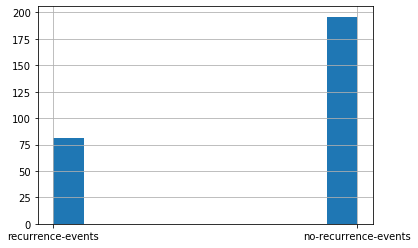

In [5]:
filtered_df = data[data[['node-caps', 'breast-quad']].notnull().all(1)]
filtered_df['Class'].hist()

**2. Solution**

In [7]:
def split(data):
    vals = data.split("-")
    return (int(vals[1]) + int(vals[0]))/2

data["inv-nodes"] = data["inv-nodes"].apply(split)

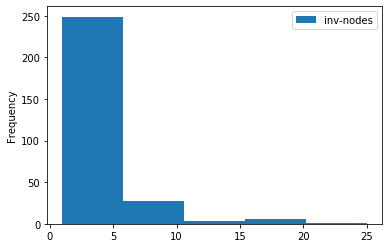

In [8]:
filtered_df = data[['Class', 'inv-nodes']]
ax = filtered_df.plot.hist(by='inv-nodes', bins=5)

---

#### Problem 2

Drop all null values before starting with these tasks.

1. Just like the "inv-nodes" column, replace the class interval values by class mean in the "tumor-size" column and plot a bar graph of the average tumor size for each "age" group.
2. For each menopause stage, plot a pie chart for degree of malignancy (deg-malig) values. Use subplots, where each subplot handles a menopause stage.
3. Label the recurrence and no-recurrence events as 0 and 1 respectively and plot a histogram to show the frequency of recurrence and no-recurrence events for different "breast-quad" values. Use subplots for the different breast-quad values.

#### Solution

In [6]:
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,1.0,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,1.0,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,1.0,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,1.0,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,4.0,yes,2,left,right_up,no,recurrence-events


In [29]:
data = data.dropna()

**1. Solution**

In [10]:
data["tumor-size"] = data["tumor-size"].apply(split)

In [11]:
uniqueAges = sorted(data["age"].unique(), key = lambda x: int(x.split("-")[0]))
tumorSizes = []
for x in uniqueAges:
    df = data[data["age"] == x]
    tumorSizes.append(df["tumor-size"].mean())

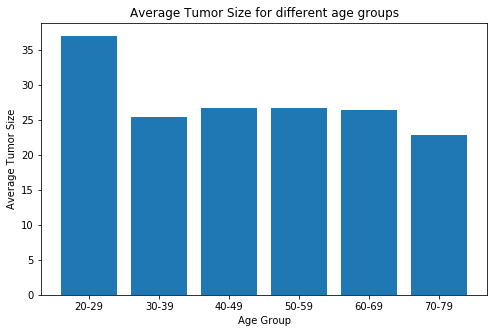

In [12]:
plt.figure(figsize=(8,5))
plt.bar(uniqueAges, tumorSizes)
plt.xlabel("Age Group")
plt.ylabel("Average Tumor Size")
plt.title("Average Tumor Size for different age groups")
plt.show()

**2. Solution**

In [13]:
unique_meno = data["menopause"].unique()

In [14]:
menopause_dfs = []
for x in unique_meno:
    menopause_dfs.append(data[data["menopause"] == x])

In [15]:
labels = data["menopause"].unique()
menopauseMalignancy = [x["deg-malig"].value_counts() for x in menopause_dfs]

In [16]:
malignancies = []
maligCounts = []
for x in menopauseMalignancy:
    counts = []
    malignancies.append(list(x.keys()))
    for key in x.keys():
        counts.append(x[key])
    maligCounts.append(counts)

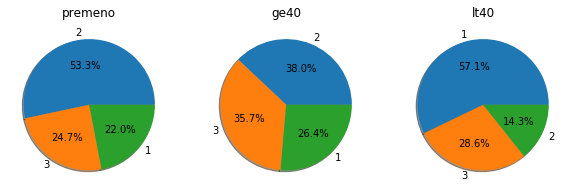

In [17]:
fig, axes = plt.subplots(1,len(unique_meno), figsize = (10, 10))

for i in range(len(unique_meno)):
    axes[i].pie(maligCounts[i], labels=malignancies[i], autopct='%1.1f%%', shadow=True)
    axes[i].set_title(unique_meno[i])

plt.show()

**3. Solution**

In [30]:
unique_quad = data["breast-quad"].unique()
data["Class"] = data["Class"].replace("recurrence-events", 0)
data["Class"] = data["Class"].replace("no-recurrence-events", 1)

In [31]:
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,0
1,50-59,ge40,15-19,0-2,no,1,right,central,no,1
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,0
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,1
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,0


In [32]:
percentVals = []
quad_dfs = []
for x in unique_quad:
    quad_dfs.append(data[data["breast-quad"] == x])

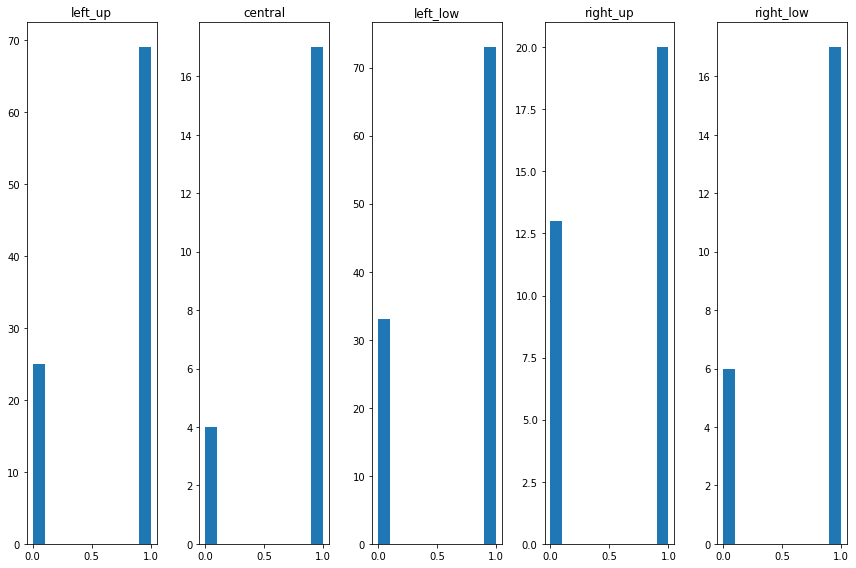

In [33]:
fig, axes = plt.subplots(1,len(unique_quad), figsize = (12, 8))

for i in range(len(unique_quad)):
    axes[i].hist(quad_dfs[i]["Class"])
    axes[i].set_title(unique_quad[i])
    
fig.tight_layout()    
plt.show()

---

### <font color="brown">Part 2</font>

##### In this part, you will explore a Pima Indians diabetes dataset, pimaIndiansDiabetes.csv

In [34]:
diabetes = pd.read_csv("PimaIndiansDiabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,NaN,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,32.9,0.171,63,0
764,2,122,70.0,27,0,36.8,0.340,27,0
765,5,121,72.0,23,112,26.2,0.245,30,0
766,1,126,60.0,0,0,30.1,0.349,47,1


#### Problem
1. Place the BMI column values into one of 4 groups labeled 0, 1, 2 and 3, by splitting at 18.5, 25 and 30 respectively. (If value <= 18.5 then group 0, if 18.5 < value <= 25 then group 1, etc.)
Make sure that these values are of 'int' type.
2. Put the Age column values into one of 3 groups labeled 0, 1, and 2, by splitting at the 40th and 90th percentile values respectively.<br>
<b>You can use the [np.percentile](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) function.</b>
3. Identify and remove outliers in the columns Glucose, SkinThickness, and Insulin.<br>
For this, in every column, discard the rows where the values are more than Q<sub>3</sub> + k(IQR) or less than Q<sub>1</sub> - k(IQR).<br>
Here, Q<sub>1</sub> is the 25th percentile value, Q<sub>3</sub> is the 75th percentile value and IQR (or Inter-Quartile Range) is Q<sub>3</sub> - Q<sub>1</sub>.<br>
'k' is an adjustable value. You can use k = 1.5 for this task. Click [here](https://www.purplemath.com/modules/boxwhisk3.htm) to read more on this.
4. Perform Min-Max scaling for all the Insulin column. Read more on Min-Max scaling [here](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-min-max-scaling).
5. Fill in the missing BloodPressure values with the average BloodPressure of the age group to which the person belongs to.

In [102]:
diabetes = pd.read_csv("PimaIndiansDiabetes.csv")
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,NaN,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1
5,5,116,74.0,0,0,25.6,0.201,30,0
6,3,78,NaN,32,88,31.0,0.248,26,1
7,10,115,0.0,0,0,35.3,0.134,29,0
8,2,197,70.0,45,543,30.5,0.158,53,1
9,8,125,96.0,0,0,0.0,0.232,54,1


**1. Solution**

In [103]:
def makeBMICat(x):
    if x <= 18.5:
        return 0
    if x <= 25:
        return 1
    if x <= 30:
        return 2
    return 3
diabetes['BMI'] = diabetes['BMI'].apply(makeBMICat)

In [104]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,3,0.627,50,1
1,1,85,66.0,29,0,2,0.351,31,0
2,8,183,NaN,0,0,1,0.672,32,1
3,1,89,66.0,23,94,2,0.167,21,0
4,0,137,40.0,35,168,3,2.288,33,1
5,5,116,74.0,0,0,2,0.201,30,0
6,3,78,NaN,32,88,3,0.248,26,1
7,10,115,0.0,0,0,3,0.134,29,0
8,2,197,70.0,45,543,3,0.158,53,1
9,8,125,96.0,0,0,0,0.232,54,1


**2. Solution**

In [105]:
perc40 = np.percentile(diabetes['Age'],40)
perc90 = np.percentile(diabetes['Age'],90)
def makeAgeCat(x):
    if x <= perc40:
        return 0
    if x > perc90:
        return 2
    return 1
diabetes['Age'] = diabetes['Age'].apply(makeAgeCat)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,3,0.627,1,1
1,1,85,66.0,29,0,2,0.351,1,0
2,8,183,NaN,0,0,1,0.672,1,1
3,1,89,66.0,23,94,2,0.167,0,0
4,0,137,40.0,35,168,3,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,3,0.171,2,0
764,2,122,70.0,27,0,3,0.340,0,0
765,5,121,72.0,23,112,2,0.245,1,0
766,1,126,60.0,0,0,3,0.349,1,1


**3. Solution**

In [106]:
def removeOutliers(column):
    Q1 = np.percentile(diabetes[column], 25)
    Q3 = np.percentile(diabetes[column], 75)
    IQR = Q3 - Q1
    return Q1,Q3,IQR

In [107]:
Q1, Q3, IQR = removeOutliers('Glucose')
diabetes = diabetes[(diabetes['Glucose'] >= Q1-11.5*IQR) & (diabetes['Glucose'] <= Q3+1.5*IQR)]

In [108]:
Q1, Q3, IQR = removeOutliers('SkinThickness')
diabetes = diabetes[(diabetes['SkinThickness'] >= Q1-11.5*IQR) & (diabetes['SkinThickness'] <= Q3+1.5*IQR)]

In [109]:
Q1, Q3, IQR = removeOutliers('Insulin')
diabetes = diabetes[(diabetes['Insulin'] >= Q1-11.5*IQR) & (diabetes['Insulin'] <= Q3+1.5*IQR)]

In [110]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,3,0.627,1,1
1,1,85,66.0,29,0,2,0.351,1,0
2,8,183,NaN,0,0,1,0.672,1,1
3,1,89,66.0,23,94,2,0.167,0,0
4,0,137,40.0,35,168,3,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,3,0.171,2,0
764,2,122,70.0,27,0,3,0.340,0,0
765,5,121,72.0,23,112,2,0.245,1,0
766,1,126,60.0,0,0,3,0.349,1,1


**4. Solution**

In [111]:
diabetes["Insulin"] = (diabetes["Insulin"] - min(diabetes["Insulin"]))/(max(diabetes["Insulin"]) - min(diabetes["Insulin"]))

In [112]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0.000000,3,0.627,1,1
1,1,85,66.0,29,0.000000,2,0.351,1,0
2,8,183,NaN,0,0.000000,1,0.672,1,1
3,1,89,66.0,23,0.295597,2,0.167,0,0
4,0,137,40.0,35,0.528302,3,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,0.566038,3,0.171,2,0
764,2,122,70.0,27,0.000000,3,0.340,0,0
765,5,121,72.0,23,0.352201,2,0.245,1,0
766,1,126,60.0,0,0.000000,3,0.349,1,1


**5. Solution**

In [124]:
ageDict = {}
bps_notnull = diabetes[diabetes["BloodPressure"].notnull()]

age0 = bps_notnull[bps_notnull["Age"] == 0]
ageDict[0] = sum(age0["BloodPressure"])/age0.shape[0]
age1 = bps_notnull[bps_notnull["Age"] == 1]
ageDict[1] = sum(age1["BloodPressure"])/age1.shape[0]
age2 = bps_notnull[bps_notnull["Age"] == 2]
ageDict[2] = sum(age2["BloodPressure"])/age2.shape[0]

diabetes['BloodPressure'] = diabetes['BloodPressure'].fillna(diabetes['Age'].apply(lambda x: ageDict[x]))

In [125]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35,0.000000,3,0.627,1,1
1,1,85,66.000000,29,0.000000,2,0.351,1,0
2,8,183,71.232283,0,0.000000,1,0.672,1,1
3,1,89,66.000000,23,0.295597,2,0.167,0,0
4,0,137,40.000000,35,0.528302,3,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.000000,48,0.566038,3,0.171,2,0
764,2,122,70.000000,27,0.000000,3,0.340,0,0
765,5,121,72.000000,23,0.352201,2,0.245,1,0
766,1,126,60.000000,0,0.000000,3,0.349,1,1
